
          판매제품명  사이즈 제품상태    희망가격           날짜
0    DD1391-100  295    1  300000  2021.11.18.
1    DD1391-100  235    0  295000  2021.11.18.
2    DD1391-100  265    0  290000  2021.11.18.
3    DD1391-100  205    0  250000  2021.11.18.
5    DD1391-100  260    0  300000  2021.11.18.
..          ...  ...  ...     ...          ...
991  DD1391-100  240    0  350000  2021.09.12.
995  DD1391-100  275    0  260000  2021.09.12.
996  DD1391-100  280    1  290000  2021.09.12.
997  DD1391-100  240    0  350000  2021.09.11.
999  DD1391-100  275    1  260000  2021.09.11.

[310 rows x 5 columns]


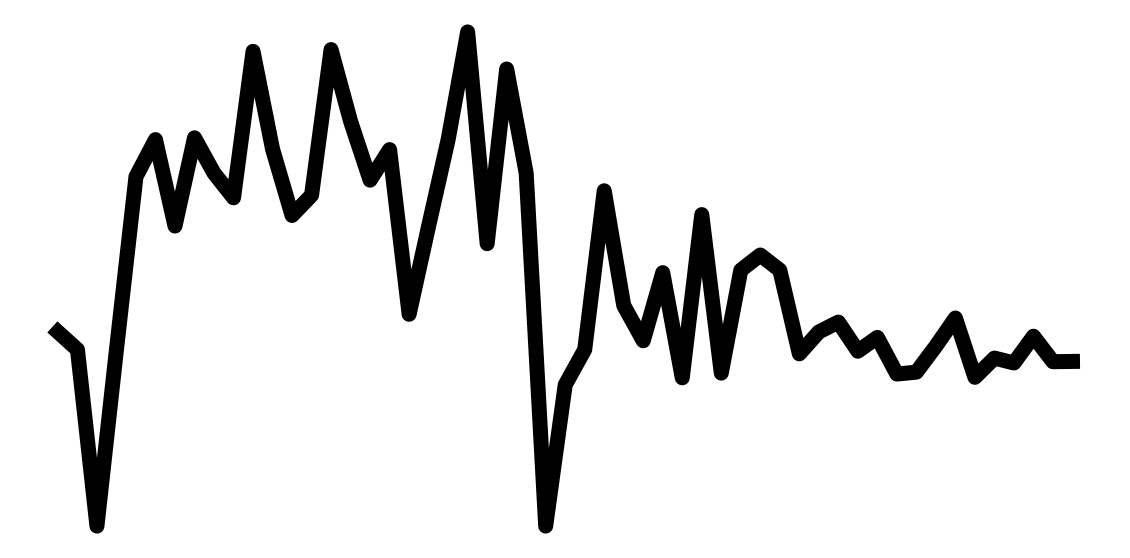

In [31]:
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as bs
from copy import deepcopy
import pyperclip
import time
import csv
import pandas as pd
import numpy as np
import re
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

ID = ''
PW = ''
count = 0
form_str = ''
pandas_list = []
contents_list = []

def copy_input(xpath, input, driver):
    
    pyperclip.copy(input)
    driver.find_element_by_xpath(xpath).click()
#     ActionChains(driver).key_down(Keys.CONTROL).send_keys('v').key_up(Keys.CONTROL).perform() #WINDOWS
    ActionChains(driver).key_down(Keys.COMMAND).send_keys('v').key_up(Keys.CONTROL).perform() #MAC
    time.sleep(1)

def login_naver(driverpath):
#     driver = webdriver.Chrome('/usr/local/bin/chromedriver')
    driver = webdriver.Chrome(driverpath)
    driver.implicitly_wait(3)

    driver.get('https://nid.naver.com/nidlogin.login?mode=form&url=https%3A%2F%2Fwww.naver.com')

    copy_input('//*[@id="id"]', ID, driver)
    time.sleep(1)
    copy_input('//*[@id="pw"]', PW, driver)
    time.sleep(1)
    driver.find_element_by_xpath('//*[@id="log.login"]').click()
    
    return driver

def crawling(filepath, driver):
    
    cafeurl = 'https://cafe.naver.com/sssw/'
    clubid = 10625158
    menuid = 371
    userdisplay = 50
    page_range = 20
    
    
    keywords_list = ['로우 범고래', '서울', '골든로드', 'SB 시카고', '카시나 덩크 로우 블루', '카시나 덩크 넵튠 그린 민트']
    keywords_id_list = ['DD1391-100', 'DM7708-100', 'DD1391-004', 'BQ6817-600', 'CZ6501-100','CZ6501-101']
    keywords_query = ['%08%B7%CE%BF%EC+%B9%FC%B0%ED%B7%A1']
    
    for idx in range(len(keywords_list)):    
        contents_list = []
        for i in range(page_range):
            page = str(i+1)
            content_addr = 'https://cafe.naver.com/ArticleSearchList.nhn?search.clubid=' + str(clubid) + '&search.menuid=' + str(menuid) + '&search.media=0&search.searchdate=all&search.exact=&search.include=' + '&userDisplay=' + str(userdisplay) +'&search.exclude=&search.option=0&search.sortBy=date&search.searchBy=0&search.includeAll=' +'&search.query=' + keywords_query[idx] +'&search.viewtype=title' +'&search.page=' + str(page)
            
            driver.get(content_addr) # 게시판 클릭하자마자 바로 뜨는 50개 리스트
        
#             driver.execute_script('window.scrollTo(0,2700)')
#             driver.switch_to.frame('cafe_main')
#             driver.implicitly_wait(3)
#             driver.find_element_by_xpath('//*[@id="currentSearchBy"]').click()
#             driver.find_element_by_xpath('//*[@id="divSearchBy"]/ul/li[2]/a').click()
#             copy_input('//*[@id="query"]', keywords_list[idx], driver)
#             driver.find_element_by_xpath('//*[@id="main-area"]/div[7]/form/div[3]/button').click()
            
            keyword_id = keywords_id_list[idx]
        
            driver.switch_to.frame('cafe_main')
            soup = bs(driver.page_source, 'html.parser')
#             print(soup)
            soup = soup.find_all(class_='article-board result-board m-tcol-c')[0]
#             print(soup)
            datas = soup.find_all(class_='td_article')

            for data in datas:
                article_title = data.find(class_='article')
                link = article_title.get('href')
                article_title = article_title.get_text().strip()
                contents_list.append(cafeurl + link)

        count = 0
        for content in contents_list:
            driver.get(content)
            pandas_list2 =[]
        

            driver.switch_to.frame('cafe_main')
            soup = bs(driver.page_source, 'html.parser')
            date = soup.find(class_='date').text
            date = date.split(' ')[0]
            soup = soup.find_all(class_='se-text-paragraph se-text-paragraph-align-left')

            if len(soup)==0:
                soup = bs(driver.page_source, 'html.parser')
                soup = soup.find_all(class_='se-text-paragraph se-text-paragraph-align-')
            
            try:
                for p_soup in soup:
                    num = ['5','6','7'] # '판매제품명','사이즈','제품상태','희망가격'
                    form_str = p_soup.find('span').text
                    if form_str[0]=='4':
                        pandas_list2.append(keyword_id)

                #
                    if(form_str[0] in num): 
                        if form_str[0] =='5' and form_str[0] == '6' and form_str[0] == '7':
                            if(num[-2] == ' '): #빈 양식일떄
                                pass
                        elif form_str[0] == '6':
                            print(form_str.split(':')[1])
                            if'새' in form_str.split(':')[1] or '새제품' in form_str.split(':')[1] or '새상품' in form_str.split(':')[1]:
                                pandas_list2.append(0)
                            elif form_str.split(':')[1] == "": 
                                pandas_list2.append(np.nan)
                            else:
                                pandas_list2.append(1)
                        else:
                            try:
                                pandas_list2.append(form_str.split(':')[1])
                            except(IndexError, ValueError) as e:
                                print(e)
                            
            except(IndexError, ValueError) as e:
                print(e)
                
            pandas_list2.append(date)
            if len(pandas_list2)==5:
                pandas_list.append(pandas_list2)
            else:
                pass
            count = count+1
            
        break
    
    df = pd.DataFrame(pandas_list,columns=['판매제품명', '사이즈', '제품상태', '희망가격', '날짜'])
    print(df)
    df.to_csv(filepath,index=False,encoding = 'utf-8-sig', mode='w')
    
    

def convert_contents(filepath):
    contents_df = pd.read_csv(filepath)
    print()
    re_size = re.compile(r'\d{3}')
    for idx, size in enumerate(contents_df['사이즈']):
        try:
            m_size = re_size.search(size)
            converted_size = m_size.group()
            contents_df['사이즈'][idx] = converted_size
        except TypeError as T:
            contents_df['사이즈'][idx] = np.nan
        except AttributeError as A:
            contents_df['사이즈'][idx] = np.nan

    re_price = re.compile(r'\d+.?,?\d+')
    # arr = []
    for idx, price in enumerate(contents_df['희망가격']):
        try:
            m_price = re_price.search(price)
            converted_price = m_price.group()
            if '.' in converted_price:
                converted_price = int(float(converted_price)*10000)
            elif len(converted_price) < 4:
                converted_price = int(converted_price)*10000
            elif ',' in converted_price:
                converted_price = converted_price.replace(',', '')
            if type(converted_price) == int or converted_price.isdigit(): #위에 3조건 다 해도 안되는 것들을 if, else로 한번 더 묶음
                contents_df.at[idx, '희망가격'] = int(converted_price)
                #"판명하고자하는문자열".isdigit() or str.isdigit("판단하고자 하는 문자열")
                # return => True, False 
            else:
                contents_df['희망가격'][idx] = np.nan
        except TypeError as T:
            contents_df['희망가격'][idx] = np.nan
        except AttributeError as A:
            contents_df['희망가격'][idx] = np.nan
    contents_df.dropna(inplace=True)
    print(contents_df)
    
    return contents_df

def drop_outliers(data):
    q1, q3 = np.percentile(data, [25,75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)

    mask = np.where((data > upper_bound) | (data < lower_bound))

#     print(q1, q3, iqr, lower_bound, upper_bound, mask)

    for idx in mask:
        data.loc[idx] = np.nan

if __name__ == '__main__':
    
#     crawling('contents.csv', login_naver(r'/usr/local/bin/chromedriver'))
    df = convert_contents('contents.csv')
    df.dropna(axis=0, inplace=True) 
    df.reset_index(drop=True, inplace=True)
    
    drop_outliers(df['희망가격'])
    df.dropna(axis=0, inplace=True) 
    df.reset_index(drop=True, inplace=True) # inplace => DATAFRAME객체 만들지 않고 df에서 처리한다는 의미..
    
    df.groupby(['날짜'])['희망가격'].agg(['mean']).plot(legend=False, figsize = (20,10),fontsize = 20, color= {"mean": "black"},lw=15)
    plt.axis('off')
    # df.groupby("칼럼")연속data.agg(함수)

In [3]:
df.dtypes # 각 열의 데이터 타입 확인

판매제품명    object
사이즈      object
제품상태     object
희망가격     object
날짜       object
dtype: object

(-2.6, 54.6, 243000.0, 397000.0)

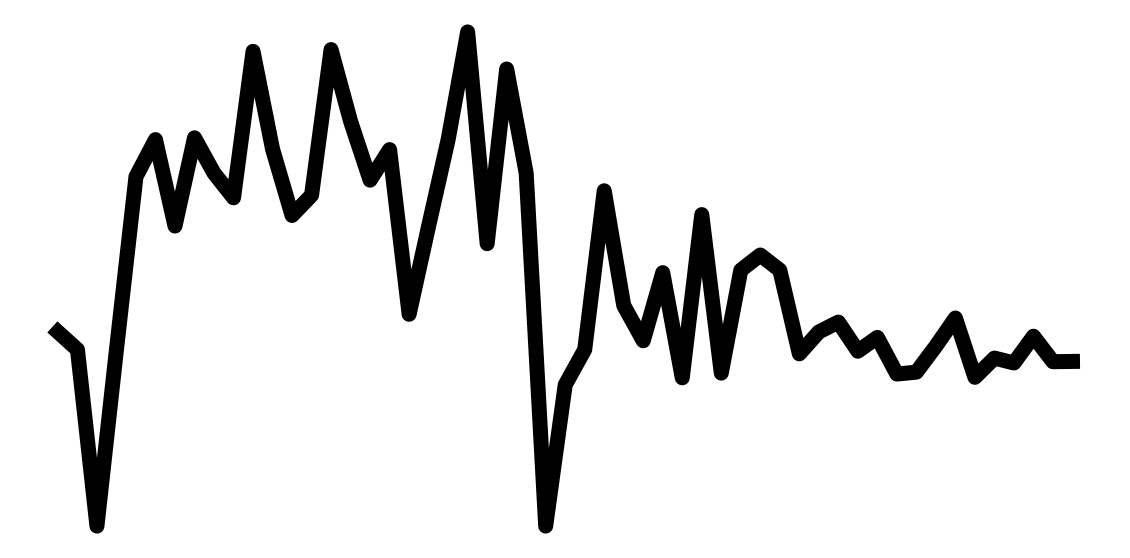

In [30]:
df.groupby(['날짜'])['희망가격'].agg(['mean']).plot(legend=False, figsize = (20,10),fontsize = 20, color= {"mean": "black"},lw=15)
plt.axis('off')

In [282]:
df.groupby(['사이즈'])['판매제품명'].agg(['count'])
df.groupby(['사이즈'])['날짜'].agg(['count'])

,count
사이즈,
205,1
220,2
225,8
230,15
235,23
240,14
245,23
250,25
255,11


['205', '220', '225', '230', '235', '240', '245', '250', '255', '260', '265', '270', '275', '280', '285', '290', '295', '300']
[1, 2, 8, 15, 23, 14, 23, 25, 11, 26, 15, 45, 24, 25, 12, 3, 7, 2]


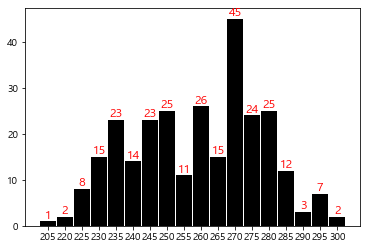

In [284]:
sizelist = df.groupby(['사이즈'])['날짜'].agg(['count']).index.values.tolist()
sizelist
real_size = []
for i in sizelist:
    real_size.append(i.replace("\n", ""))
print(real_size)

real_count = []
for i in range(len(df.groupby(['사이즈'])['날짜'].agg(['count'])['count'])):
    real_count.append(df.groupby(['사이즈'])['날짜'].agg(['count'])['count'][i])
print(real_count)


import matplotlib.pyplot as plt

x=real_size
y=real_count
plt.bar(x,y, width=0.9,color='black')

for i, v in enumerate(x):
    plt.text(v, y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 12, 
             color='red',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

plt.show()

In [273]:
sale_item = []
for i in range(len(df['판매제품명'])):
    sale_item.append(df['판매제품명'][i])
real_sale_item = []
for value in sale_item: # 제품명 반복 제거
    if value not in real_sale_item:
        real_sale_item.append(value)
print(real_sale_item)

def Bar_Graph(real_sale_item):
    
    sizelist = df.groupby(['사이즈'])['날짜'].agg(['count']).index.values.tolist()
    sizelist
    real_size = []
    for i in sizelist:
        real_size.append(i.replace("\n", ""))
    print(real_size)

    real_count = []
    for i in range(len(df.groupby(['사이즈'])['날짜'].agg(['count'])['count'])):
        real_count.append(df.groupby(['사이즈'])['날짜'].agg(['count'])['count'][i])
    print(real_count)


    import matplotlib.pyplot as plt

    x=real_size
    y=real_count
    plt.bar(x,y, width=0.9,color='black')

    for i, v in enumerate(x):
        plt.text(v, y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
                 fontsize = 12, 
                 color='red',
                 horizontalalignment='center',  # horizontalalignment (left, center, right)
                 verticalalignment='bottom')    # verticalalignment (top, center, bottom)

    plt.show()

['DD1391-100']


array([<AxesSubplot:ylabel='count'>], dtype=object)

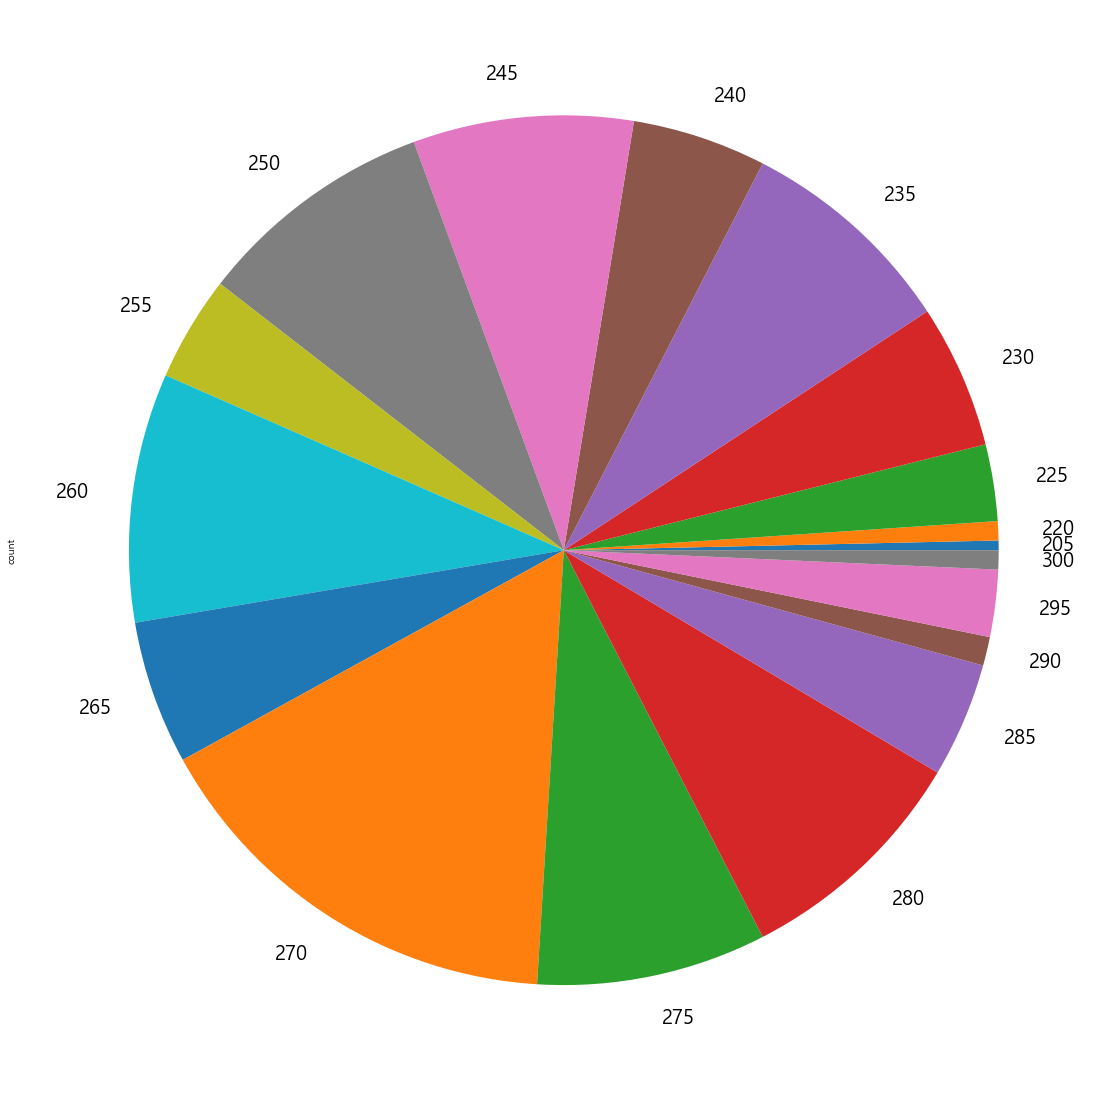

In [301]:
type(df.groupby(['사이즈'])['날짜'].agg(['count']))
df.groupby(['사이즈'])['날짜'].agg(['count']).plot.pie(subplots=True, figsize=(20,20),fontsize = 20, legend = False)
#df.groupby(['사이즈']).count()

In [129]:
date = []
#date.append(df['날짜'][::-1])
len(df['날짜'][::-1])
for i in range(len(df['날짜'][::-1])):
    date.append(df['날짜'][::-1][i])
print(set(date))
#df['날짜'][::-1]

{'2021.10.12.', '2021.11.01.', '2021.10.30.', '2021.10.16.', '2021.09.15.', '2021.10.14.', '2021.09.29.', '2021.11.02.', '2021.09.11.', '2021.11.12.', '2021.10.03.', '2021.11.06.', '2021.10.29.', '2021.11.16.', '2021.10.21.', '2021.10.19.', '2021.11.15.', '2021.10.22.', '2021.10.11.', '2021.10.18.', '2021.09.12.', '2021.10.07.', '2021.11.13.', '2021.11.07.', '2021.10.26.', '2021.10.15.', '2021.11.05.', '2021.11.10.', '2021.11.04.', '2021.09.27.', '2021.10.27.', '2021.11.11.', '2021.10.17.', '2021.11.09.', '2021.10.25.', '2021.10.13.', '2021.10.10.', '2021.10.08.', '2021.10.05.', '2021.09.28.', '2021.11.14.', '2021.09.26.', '2021.10.02.', '2021.10.24.', '2021.09.25.', '2021.10.20.', '2021.10.04.', '2021.11.03.', '2021.10.28.', '2021.10.31.', '2021.11.08.', '2021.10.09.', '2021.10.23.', '2021.11.18.', '2021.10.06.', '2021.11.17.'}


In [130]:
#df.sort_values(by=['날짜'])
#df['희망가격'].value_counts().plot(x='날짜', y='희망가격')
#real_df['희망가격'].to_csv("csvs1.csv", encoding= "utf-8-sig")
#print(df.sort_values(by=['날짜']))
new_df = df.set_index('날짜')
real_df = new_df.sort_values(by=['날짜'])
real_df

,판매제품명,사이즈,제품상태,희망가격
날짜,,,,
2021.09.11.,DD1391-100,275,1,260000
2021.09.11.,DD1391-100,240,0,350000
2021.09.12.,DD1391-100,275,0,260000
2021.09.12.,DD1391-100,280,1,290000
2021.09.12.,DD1391-100,240,0,350000
...,...,...,...,...
2021.11.18.,DD1391-100,250,0,280000
2021.11.18.,DD1391-100,280,1,319000
2021.11.18.,DD1391-100,220,0,290000


In [82]:
real_df['희망가격'].dropna(axis=0)

0      300000
1      295000
2      290000
3      250000
5      300000
        ...  
991    350000
995    260000
996    290000
997    350000
999    260000
Name: 희망가격, Length: 312, dtype: object